# Sentiment Analysis for Hindi movie reviews



### Installing Dependencies

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [ ]:
import nltk

### Preprocessing and Exploring the Dataset

Importing the Dataset **train.csv**

In [ ]:
data = pd.read_csv('D:/Download/archive (3)/train.csv')
data.head()

text  experience
0  चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...           2
1  अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...           0
2  बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...           2
3  बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...           0
4  1959 में घटित चर्चित नानावटी कांड में एक क्राइ...           1

We have got 718 rows and 2 columns in our dataset

In [ ]:
data.shape

(718, 2)

As seen, none of the entries contain a NULL value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        718 non-null    object
 1   experience  718 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.3+ KB


In [ ]:
data[690:700]

text  experience
690  बैनर :\nरे‍ड चिलीज़ एंटरटेनमेंट, इरोज एंटरटेनम...           2
691   करीब डेढ़ सौ करोड़ के भारी भरकम बजट में बनी न...           2
692  बैनर :\nएएलटी एंटरटेनमेंट, बालाजी मोशन पिक्चर्...           2
693  बैनर :\nश्री अष्टविनायक सिने विज़न लिमिटेड\n\n...           0
694  बैनर :\nईशाना मूवीज़, यूटीवी मोशन पिक्चर्स\n\n...           2
695   ग्लैमर इंडस्ट्री में यकीनन बायॉपिक फिल्मों का...           0
696  \nगो गोआ गॉन का सबसे बड़ा आकर्षण है इसका जॉम्ब...           1
697  आज से 19 साल पहले प्रदर्शित हुई सायकॉलजिकल थ्र...           0
698  एंग्री बर्ड्स एक अत्यंत ही लोकप्रिय गेम है जिस...           2
699  जब बात दिल और दिमाग के बीच फंसी हो, तो हमेशा द...           0

We have got 273 labels of Positive reviews, 240 labels of Negative reviews and 205 labels of Neutral reviews.


In [ ]:
data['experience'].value_counts()

2    273
0    240
1    205
Name: experience, dtype: int64

### Visualizing our dataset

In [ ]:
data['length'] = data['text'].map(lambda x: len(x))

In [ ]:
data['text'].map(lambda x: len(x))

0      2903
1      2940
2      4086
3      3259
4      4323
       ... 
713    3410
714    4533
715    4364
716    3311
717    3805
Name: text, Length: 718, dtype: int64

In [ ]:
data.head()

text  experience  length
0  चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...           2    2903
1  अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...           0    2940
2  बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...           2    4086
3  बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...           0    3259
4  1959 में घटित चर्चित नानावटी कांड में एक क्राइ...           1    4323

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E86E8124C0>]],
      dtype=object)

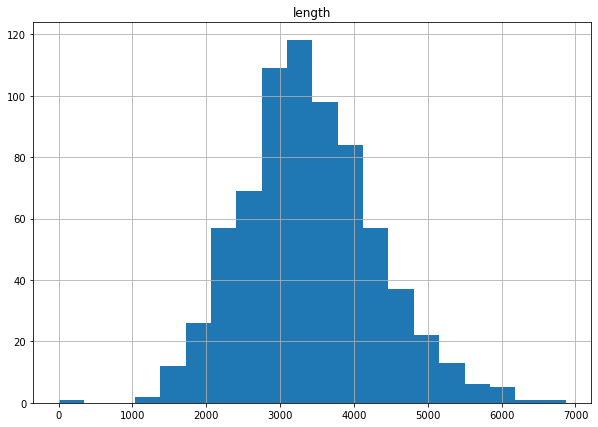

In [ ]:
data.hist(column='length',bins=20, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E86E8F6A30>,
      dtype=object)

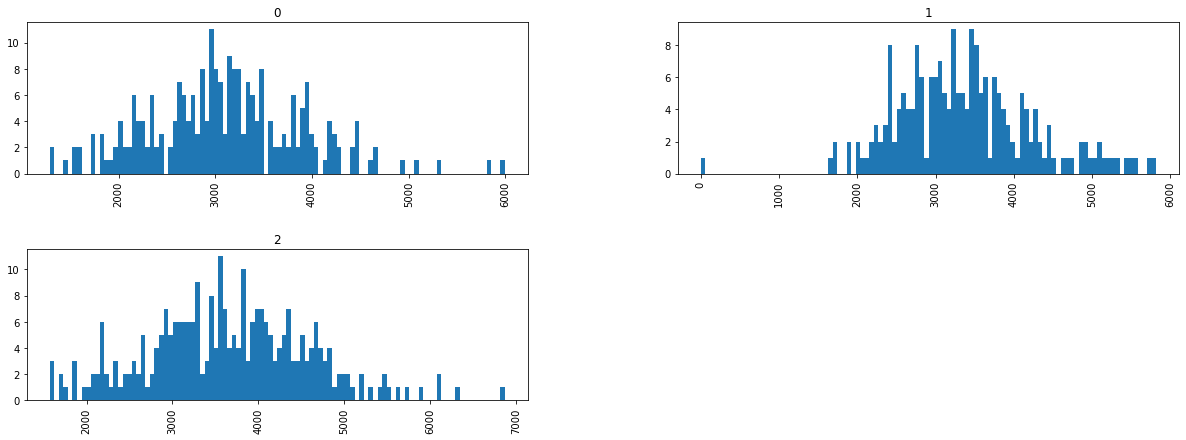

In [ ]:
data.hist(column='length', by='experience', bins=100, figsize=(20,7))

### Importing the Natural Language Toolkit(NLTK) library

In [ ]:
import nltk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re #regular expression

punctuations = ['nn','n', '।','/', '`', '+', '?', '▁(', '$', '@', '[', '_', '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '*', '', ';', '-', '}','|' ]

stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']


def text_cleaning(text, remove_stop_words=True):
    # Clean the text, with the option to remove stop_words

    # Clean the text
    text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
    text = re.sub('@[^s]+','',text)
    text = re.sub('[s]+', ' ', text)
    text = re.sub(r'#([^s]+)', r'1', text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = re.sub(r" u "," you ",text)
    text = text.lower()  # set in lowercase

    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuations])

    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stopwords_hi]
        text = " ".join(text)

    # Return a list of words
    return(text)

### WordClouds - to see which words are common in Positive, Neutral and, Negative mesaages

In [ ]:
positive_words = ''
negative_words = ''
neutral_words = ''

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sahil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#data = data.replace(['positive', 'neutral', 'negative'],[2,1,0])


In [ ]:
data.head()

text  experience  length
0  चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...           2    2903
1  अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...           0    2940
2  बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...           2    4086
3  बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...           0    3259
4  1959 में घटित चर्चित नानावटी कांड में एक क्राइ...           1    4323

In [ ]:
data['text'] = pd.Series(data['text'], dtype="string")
text = data['text']


In [ ]:
data['text'] = data['text'].apply(text_cleaning)

In [ ]:
data.text

0      चंद्रमोहन शर्मा कोप्रड्यूसर लीड ऐक्टर अक्षय कु...
1      अगर फिल्म देखने जान लीजिए बेशक फिल्म प्रडूयसर ...
2      बॉलीवुड चोरीछिपे हॉलीवुड फिल्मों कहानियां दृश्...
3      बैनर संजय दत्त प्रोडक्शन्स प्रालि रुपाली ओम एं...
4      घटित चर्चित नानावटी कांड क्राइम थ्रिलर बनने सा...
                             ...                        
713    अक्टूबर काला दिवस जाता दिन तत्कालीन प्रधानमंत्...
714    गुंडे देख सत्तर अस्सी दशक सिनेमा याद आता हीरो ...
715    chadermoha harma groupcom ग्लैमर इंडस्ट्री आर ...
716    निर्माता सुनीता गोवारीकर अजय बिजली संजीव बिजली...
717    फोर्स अंडरकवर एजेंट्स समर्पित समय आने देश जान ...
Name: text, Length: 718, dtype: object

Here, we create a list of words for  Positive, Neutral and, Negative

In [ ]:

for val in data[data['experience'] == 2].text:
    tokens = nltk.word_tokenize(val)
    for words in tokens:
        positive_words = positive_words + words + ' '

for val in data[data['experience'] == 1].text:
    tokens = nltk.word_tokenize(val)
    for words in tokens:
        neutral_words = neutral_words + words + ' '

for val in data[data['experience'] == 0].text:
    tokens = nltk.word_tokenize(val)
    for words in tokens:
        negative_words = negative_words + words + ' '

In [ ]:
#print(neutral_words)

In [ ]:
#print(negative_words)

In [ ]:
#print(positive_words)

Positive word cloud

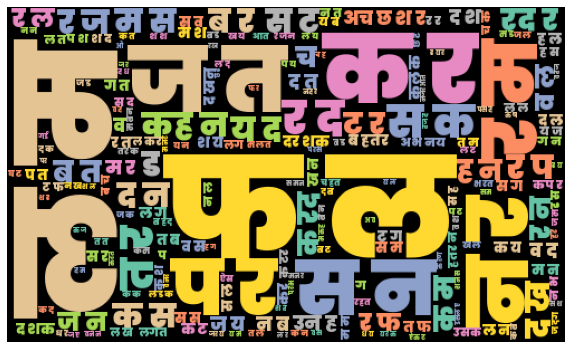

In [ ]:
positive_wordcloud = WordCloud(font_path="D:/Download/Poppins (1)/Poppins-Black.ttf", width=500, height=300, background_color='black', colormap='Set2').generate(positive_words)
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.show()

Neutral word cloud

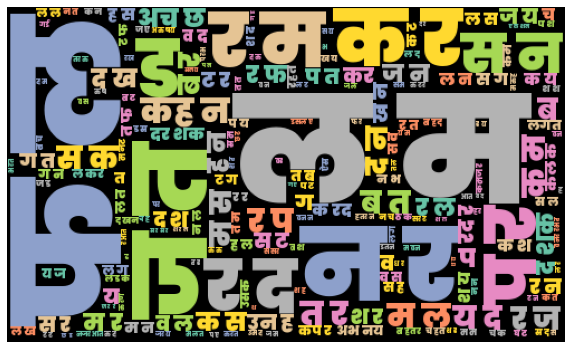

In [ ]:
neutral_wordcloud = WordCloud(font_path="D:/Download/Poppins (1)/Poppins-Black.ttf", width=500, height=300, background_color='black', colormap='Set2').generate(neutral_words)
plt.figure(figsize=(10,8))
plt.imshow(neutral_wordcloud)
plt.axis("off")
plt.show()

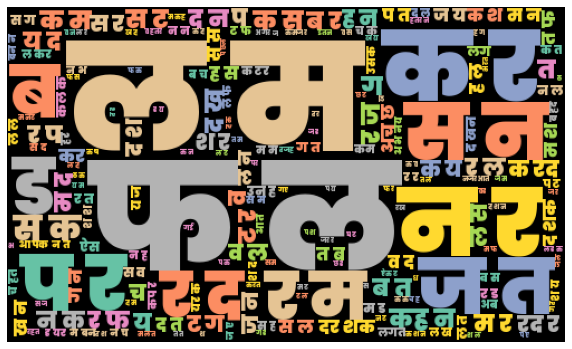

In [ ]:
negative_wordcloud = WordCloud(font_path="D:/Download/Poppins (1)/Poppins-Black.ttf", width=500, height=300, background_color='black', colormap='Set2').generate(negative_words)
plt.figure(figsize=(10,8))
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
data['text'] = data['text'].apply(text_cleaning)

In [ ]:
data.head()

text  experience  length
0  चंद्रमोहन शर्मा कोप्रड्यूसर लीड ऐक्टर अक्षय कु...           2    2903
1  अगर फिल्म देखने जान लीजिए बेशक फिल्म प्रडूयसर ...           0    2940
2  बॉलीवुड चोरीछिपे हॉलीवुड फिल्मों कहानियां दृश्...           2    4086
3  बैनर संजय दत्त प्रोडक्शन्स प्रालि रुपाली ओम एं...           0    3259
4  घटित चर्चित नानावटी कांड क्राइम थ्रिलर बनने सा...           1    4323

In [ ]:
data['length'] = data['text'].map(lambda x: len(x))

In [ ]:
data['text'].map(lambda x: len(x))

0      1871
1      1808
2      2755
3      2127
4      2863
       ... 
713    2182
714    3011
715    2897
716    2072
717    2413
Name: text, Length: 718, dtype: int64

In [ ]:
#data = data.replace(['positive', 'neutral', 'negative'],[2,1,0])


In [ ]:
text = pd.DataFrame(data['text'])
experience = pd.DataFrame(data['experience'])

In [ ]:
text.values

array([['चंद्रमोहन शर्मा कोप्रड्यूसर लीड ऐक्टर अक्षय कुमार मानें नई फिल्म एयरलिफ्ट कहानी किरदार बिल्कुल सच्चे खाड़ी युद्ध कवर सीनियर रिपोर्टर वक्त एयर इंडिया उच्च पद अफसर कहानी सच परे मानते हालांकि स्क्रीन देखेंगे सच बेहद करीब बॉलिवुड खबरें फेसबुक पाना लाइक bt movie फिल्म कहानी चार अहम किरदारों इर्दगिर्द घूमती चारों मिलाकर लीड किरदार स्क्रीन उतारा अक्षय कुमार निभाया फिल्म खाड़ी युद्ध आधारित जंग दौरान कुवैत फंसे करीब लाख सत्तर हजार भारतीय नागरिकों देश वापस लाए जाने घटना डायरेक्टर अंदाज पेश किरदारों पर्दे उतारने फिल्मी आजादी जरूरत आजादी फिल्म डायरेक्टर राजा मेनन ली देखिए फिल्म ट्रेलर घटना ज्यादा असरदार ढंग पेश मकसद राजा फिल्म सीन्स दुबई करीब चार घंटे दूरी स्थित रसेल खेमा जाकर शूट गुजरात भुज राजस्थान आउटडोर लोकेशन फिल्म अधिकांश शूटिंग गई कहानी रंजीत कात्याल अक्षय कुमार पत्नी अमृता कात्याल निमरत कौर प्यारीसी बेटी कुवैत रहता नामी बिज़नसमैन खाड़ी युद्ध छिड़ने बुरी बर्बाद कुवैत रह भारतीय नागरिकों रंजीत परिवार फंस जाता सरकारी अधिकारी हालात निपटने विकल्पों विचार कुवैत रईस बिज़नसमैन रंजीत प्रभाव

In [ ]:
experience

experience
0             2
1             0
2             2
3             0
4             1
..          ...
713           1
714           1
715           2
716           2
717           2

[718 rows x 1 columns]

## Converting words to vectors

- First create a vocabulary of all words in the dataset (text messages)

-  Vector created as follows :
 - positions with respect to highest occuring word

Counting how many times a word appears in the dataset

In [ ]:
from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  22722


Sorting in decreasing order (Word with highest frequency appears first)

In [ ]:
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['फिल्म', 'कहानी', 'जाता', 'उन्होंने', 'बात', 'किरदार', 'निर्देशक', 'जाती', 'ज्यादा', 'अभिनय', 'काम', 'गई', 'नजर', 'सीन', 'दर्शकों', 'कपूर', 'फिल्मों', 'संगीत', 'बार', 'लगता', 'खान', 'देखने', 'उसकी', 'बेहतरीन', 'रूप', 'कलाकार', 'बेहद', 'गए', 'जाते', 'बीच', 'करती', 'दोनों', 'ऐसा', 'पूरी', 'रोल', 'हर', 'वाला', 'पेश', 'शादी', 'नाम', 'लेकर', 'कोशिश', 'आपको', 'अच्छी', 'दृश्य', 'अब', 'आता', 'कम', 'अच्छा', 'मिनट', 'वाली', 'निर्माता', 'बन', 'सिंह', 'दर्शक', 'क्या', 'घंटे', 'आती', 'देता', 'प्यार']


Mapping from words to index

In [ ]:
vocab_size = len(vocab)
print(vocab_size)
word2idx = {}

for i, word in enumerate(vocab):
    word2idx[word] = i

22722


In [ ]:
word2idx['ज्यादा']

8

### Text to Vector

In [ ]:
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

Convert all titles to vectors

In [ ]:
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for ii, (_, text_) in enumerate(text.iterrows()):
    word_vectors[ii] = text_to_vector(text_[0])

In [ ]:
print(word_vectors)

[[11  7  1 ...  0  0  0]
 [17  3  0 ...  0  0  0]
 [22  1  0 ...  0  0  0]
 ...
 [16  3  2 ...  0  0  0]
 [ 8  1  0 ...  0  0  0]
 [12  3  2 ...  1  1  1]]


In [ ]:
word_vectors.shape

(718, 22722)

## Converting words to vectors using TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(718, 3347)

## Choosing which algorithm we want to use a features : TFIDF or using custom vocabulary ?

In [ ]:
#features = word_vectors
features = vectors

In [ ]:
print(features)

  (0, 432)	0.040475314704818174
  (0, 1354)	0.024252969545456804
  (0, 483)	0.030730962648456747
  (0, 1248)	0.03850717181887287
  (0, 1135)	0.025308663965626844
  (0, 2860)	0.12465112691132109
  (0, 3167)	0.028677285092805344
  (0, 1147)	0.038046837942756
  (0, 903)	0.06976636144830681
  (0, 1282)	0.05879084536890134
  (0, 3242)	0.06827940515761466
  (0, 781)	0.04145422826417274
  (0, 3315)	0.05097940179735204
  (0, 2783)	0.055135959662303856
  (0, 438)	0.042944204423165426
  (0, 3004)	0.019464693388598523
  (0, 2014)	0.021171339639922827
  (0, 1339)	0.05533169660078195
  (0, 3144)	0.04709469124556427
  (0, 994)	0.03182544056204604
  (0, 3295)	0.04584768431343584
  (0, 677)	0.02084617107113713
  (0, 2112)	0.025879862455885968
  (0, 2945)	0.03730470575600976
  (0, 3267)	0.10831736029732243
  :	:
  (717, 528)	0.15989555992293578
  (717, 2005)	0.0461638968708134
  (717, 2886)	0.030353137291972847
  (717, 2788)	0.10527641000944786
  (717, 1291)	0.020691004254343684
  (717, 534)	0.03823212

### Splitting into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, data['experience'], test_size=0.15, random_state=111)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(610, 3347)
(108, 3347)
(610,)
(108,)


## Classifying using sklearn pre built classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [ ]:
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [ ]:
from sklearn.metrics import accuracy_score
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [ ]:
for scores in pred_scores_word_vectors:
  print(scores)

('SVC', [0.6203703703703703])
('KN', [0.48148148148148145])
('NB', [0.5092592592592593])
('DT', [0.5833333333333334])
('LR', [0.5277777777777778])
('RF', [0.5277777777777778])


In [ ]:
def find(p):
    if p == 2:
        print ("Positive Review")
    elif p == 1:
        print ("Neutral Review")
    else:
        print('Negative Review')

In [ ]:
text = "अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पहले तो आप यह जान लीजिए कि बेशक इस फिल्म के साथ प्रडूयसर कुमार मंगत, डायरेक्टर अश्विनी धीर के नाम के साथ परेश रावल का नाम भी जुड़ा हो लेकिन कुछ साल पहले आई फिल्म 'अतिथि तुम कब जाओगे' से इस फिल्म का कुछ लेना-देना नहीं है। यूं तो इस फिल्म के क्लाइमैक्स में आपको पिछली फिल्म के हीरो अजय देवगन भी नजर आएंगे लेकिन इन दोनों फिल्मों में सबसे बड़ा फर्क यह है कि इस बार चाचा जी मुंबई की किसी सोसाइटी की बजाय अपने एक अनजान रिश्तेदार के यहां लंदन जा पहुचे हैं और इस बार चाचा जी के साथ चाची जी भी हैं।"
hello= [text_cleaning(text)]
integers = vectorizer.transform(hello)

In [ ]:
p = svc.predict(integers)
find(p)

Negative Review


## Saving the Best Model

In [ ]:
import joblib
joblib.dump(svc, 'best.pkl')
print ("Best Model (Support Vector Machine) Saved")

Best Model (Support Vector Machine) Saved


In [ ]:
best = joblib.load('best.pkl')

In [ ]:
best

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing our classifiers

In [ ]:
text1 = ["फिल्म एक शानदार क्रिकेटर अर्जुन तलवार की है, जो अपने करियर की पीक पर अचानक खेलना छोड़ देता है। एक पति की है, जो अपनी पत्नी की नजरों में नकारा बन चुका है। एक पिता की है, जो अपने बेटे के नजरों में इज्जत कमाने के लिए जान की बाजी लगा देता है। अर्जुन तलवार (शाहिद कपूर) अपने जमाने का सबसे कामयाब रणजी खिलाड़ी हुआ करता था लेकिन 10 साल पहले वो क्रिकेट को अलविदा कहकर अपने प्यार विद्या (मृणाल ठाकुर) और बेटे (रोनित कामरा) के साथ सीधी-सिंपल जिंदगी बिताने लगता है। उसकी जिंदगी में तूफान तब आता है, जब उसे नौकरी से सस्‍पेंड कर दिया जाता है। अब वो हर तरफ से सिर्फ एक हारा हुआ इंसान है। पैसे-पैसे के लिए मोहताज। घर का पूरा जिम्मा बीवी उठाती है। इसी बीच उसका बेटा किट्टू अपने जन्मदिन पर अर्जुन से 500 रुपये के कीमत वाली इंडियन टीम की जर्सी गिफ्ट देने की जिद कर बैठता है। अर्जुन अपने मासूम बेटे की ये ख्वाहिश पूरी करने के लिए 500 रुपये जुटाने की हर कोशिश करता है। क्रिकेट ग्राउंड में पसीना बहाने से लेकर उधार मांगने और चोरी करने तक, लेकिन नाकामयाब रहता है। यहीं से अर्जुन की जिंदगी का मकसद बदल जाता है। वह सारी दुनिया की तरह अपने बेटे की नजरों में नकारा नहीं बनना चाहता, इसलिए 36 की उम्र में, जब लोग रिटायरमेंट की सोचते हैं, दोबारा क्रीज पर उतरता है। शाहिद कपूर की यह फिल्म निर्देशक गौतम तिन्ननुरी की 2019 में इसी नाम से आई नानी स्टारर नैशनल अवॉर्ड फिल्म की हिंदी रीमेक है। यह हिंदी वर्जन भी गौतम ने खुद डायरेक्ट किया है और वे दूसरी बार भी अपनी छाप छोड़ने में कामयाब रहे हैं। फिल्म इमोशन और ऐक्शन (क्रिकेट) दोनों ग्राउंड पर चौके-छक्के मारती है। तेलुगू के मुकाबले इस बार कुछ सीन और ज्यादा प्रभावी हैं, जैसे एक सीन में अर्जुन के कोच सर (पंकज कपूर) के सिगरेट की धुएं से उसका पूरा चेहरा भर जाता है, जो उसकी धुंधली जिंदगी का अक्स मालूम देता है। वहीं, इंटरवल से पहले जब वह दोबारा क्रिकेट के मैदान में कदम रखता है, उसकी लंबी परछाई उसकी आने वाली कामयाबी का सुंदर मेटाफर लगती है।"]
text2 = ["'या तो व्यस्त रहो या फिर व्यस्त होर मर जाओ'। रूटीन जिंदगी को हमेशा से कम आंका गया है। जबकि कभी-कभी जब ऐसा लगता है कि आगे अब कुछ नहीं बचा है, तब यह रूटीन वाली नौकरी और काम ही है, जो आपकी जिंदगी को आगे बढ़ाती है। 'द लंचबॉक्‍स' में इरफान का किरदार साजन याद होगा, उसकी कही बात भी याद होगी कि जिंदगी चलती रहती है। दिन धीरे-धीरे महीने बन जाते हैं और महीने धीरे-धीरे साल में बदल जाते हैं, क्योंकि वह पूरी श‍िद्दत से अपनी 9 से 5 की ड्यूटी करता रहता है। ये रूटीन ही है, जो आगे बढ़ाती है। शर्माजी की होम अप्लायंसेज वाली नौकरी भी ऐसी ही थी। उन्‍हें व्‍यस्‍त रखती थी। कई बार जिंदगी में व्‍यस्‍त रहना ही सबसे अध‍िक मायने रखता है। लेकिन रिटायरमेंट के बाद अब क्‍या? शर्माजी को खाना पकाने से प्‍यार है। वॉट्सऐप ग्रुप और पाककला के इसी प्‍यार के कारण वह एक महिलाओं वाली किटी गैंग से मिलते हैं। जूही चावला इस गैंग की लीडर हैं। सोसाइटी को लेकर महिलाओं के इस गॉसिप गैंग में शर्माजी का मन रमने लगता है। उन्‍हें एक तरह की खुशी और सांत्‍वना का एहसास होता है। ये महिलाएं सोसाइटी के रुबते वाले वर्ग से हैं, लेकिन उनकी जिंदगी में भी एक उजड़ापन है। एक बहुत ही सरल और सहज कहानी के जरिए डायरेक्‍टर हितेश भाटिया हमें जिंदगी का स्‍वाद देते हैं। बढ़ती उम्र और पुरुष-महिला को लेकर जो रूढ़ियां हैं, उन पर हल्के-फुल्के अंदाज में ही ऐसे चोट करते हैं कि आप सोचने पर मजबूर हो जाते हैं। रॉबर्ट डी नीरो और नैन्सी मेयर्स की 'द इंटर्न' हो या शूजीत सरकार की 'पीकू' को आप यहां अपवाद के तौर पर ले सकते हैं। क्‍योंकि अक्‍सर उम्र के एक पड़ाव के बाद बड़े हो चुके बच्चे अपने बुजुर्ग और परेशान माता-पिता के भाव को नहीं समझते। वह एहसान फरामोश हो जाते हैं। जबकि माता-पिता असल जिंदगी में त्‍याग और बलिदान का सबसे बड़ा प्रतीक होते हैं। जिंदगी कई बार एकतरफा भी हो जाती है। 'शर्माजी नमकीन' खुद से प्‍यार करने, अकेलेपन और सिंगल फादर होने के मायने पर बात करती है। यह फिल्‍म बड़ी चालाकी से 'बागबान' वाले नैरेटिव से अलग सोचने के लिए एक नया आयाम देती है।"]
text3 = ["अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पहले तो आप यह जान लीजिए कि बेशक इस फिल्म के साथ प्रडूयसर कुमार मंगत, डायरेक्टर अश्विनी धीर के नाम के साथ परेश रावल का नाम भी जुड़ा हो लेकिन कुछ साल पहले आई फिल्म 'अतिथि तुम कब जाओगे' से इस फिल्म का कुछ लेना-देना नहीं है। यूं तो इस फिल्म के क्लाइमैक्स में आपको पिछली फिल्म के हीरो अजय देवगन भी नजर आएंगे लेकिन इन दोनों फिल्मों में सबसे बड़ा फर्क यह है कि इस बार चाचा जी मुंबई की किसी सोसाइटी की बजाय अपने एक अनजान रिश्तेदार के यहां लंदन जा पहुचे हैं और इस बार चाचा जी के साथ चाची जी भी हैं।"]
text4 = ["ओटीटी के 'उरूज' के बाद यदि आज के दौर को सिनेमा का खूबसूरत दौर कहा जाए, तो गलत न होगा। इस वक्त ओटीटी पर मजबूत महिला किरदारों से सजे कॉन्टेंट का मेला-सा लगा हुआ है और उसी कड़ी को 'जलसा' के जरिए आगे बढ़ाती हैं विद्या बालन और शेफाली शाह जैसी दो समर्थ अभिनेत्रियां। फिल्म में जलसा अंडरकरेंट चलता है, किरदारों के बाहरी परिवेश और अंतर्मन में। असल में 'जलसा' की कहानी अपराधबोध, आत्मविश्लेषण और मानवीय व्यवहार की पेचीदगियों के इर्द-गिर्द घूमती है। यह किरदारों के अंतर्द्वंद से निकल कर दर्शक के मन की गहराई में पैठ जाती है और सवाल करती है, 'जब बात अपने पर आती है, तो इंसान सही-गलत को परे रख दूसरी खाल ओढ़ लेता है क्या? कुछ और बन जाता है?' कहानी की शुरुआत ही एक शॉकिंग एलिमेंट से होती है। माया मेनन (विद्या बालन) बेहद ही चर्चित न्यूज पोर्टल की जानी -मानी एंकर और पत्रकार है। वो इतनी फेमस है कि शहर के कई होर्डिंग्स में उनके रौबदार फोटो नजर आते हैं। एक रात अपने बेबाक इंटरव्यू में रिटायर चीफ जस्टिस की बखिया उधेड़ने के बाद माया जब खुश और संतुष्ट होकर घर लौट रही होती हैं, तब नींद के बोझ की मारी माया को कार चलाते हुए झपकी आ जाती है और उसकी कार से एक दुर्भायपूर्ण हादसा हो जाता है। माया जो उसूलों की पक्की है, एक ऑटिस्टिक बच्चे की मां है, पति से अलहदगी हो चुकी है और माया अब अपने बेटे और मां के साथ रहती है, जो अपने साथी इकबाल खान के साथ बहुत कुछ साझा करती है, ऐसी माया की जिंदगी उस हादसे से मिनटों में बदल जाती है। विडंबना ये है कि उसका असर सिर्फ माया पर नहीं बल्कि उसके घर मेड का काम करने वाली रुखसाना (शेफाली शाह), उसके परिवार, बेटे और कहानी से जुड़े अन्य कई ऐसे किरदारों पर पड़ता है कि दर्शक होने के नाते आप भौचक्के रह जाते हैं। ॉ 'तुम्हारी सुलु' में विद्या बालन को एक आम गृहणी के रूप में दर्शा चुके निर्देशक सुरेश त्रिवेणी ने इस बार विद्या बालन की तमाम क्षमताओं का बखूबी इस्तेमाल किया है। इस थ्रिलर फिल्म का मूड शुरू से आखिर तक बेचैन करने वाला साबित होता है। उन्होंने माया और रुखसाना जैसे मुख्य किरदारों के जरिए कहानी का ताना-बाना बुना है, जहां दोनों के बीच नाम मात्र के संवाद हैं, मगर अपने इमोशंस के जरिए ये दोनों किरदार कहानी को मुखर बना देते हैं। फिल्म धीमी गति से आगे बढाती है। फिल्म की लंबाई थोड़ी कम की जा सकती थी, मगर फिल्म का तकनीकी पक्ष बहुत सबल है और साथ ही कहानी का एस्थेटिक दर्शकों को कई बिंदुओं पर ले जाता है। कामकाजी महिलाओं का दबाव, सिंगल मदर की चुनौतियां, प्रतिष्ठा को बनाए रखने का प्रेशर, उच्च वर्ग और निम्न वर्ग का भेद और उससे बढ़ कर अलग-अलग सोशियो-इकोनॉमिकल किरदारों का मानसिक हाल। क्लाइमैक्स कहानी का सबसे बेचैन कर देने वाला और साथ ही सशक्त भाग बन पड़ा है। निर्देशक ने समंदर की गरजती लहरों के बीच फिल्म के अंत को बखूबी फिल्माया है।एन्ड होते-होते तक कलेजा मुंह को आ जाता है। फिल्म का बैकग्राउंड स्कोर बढ़िया है। सौरभ गोस्वामी का कैमरा वर्क फिल्म की अकुलाहट और उदासी को बरकरार रखता है।विद्या बालन और शेफाली शाह कहानी की दो आधार स्तंभ साबित हुई हैं। दोनों अभिनेत्रियां अभिनय के नजरिए से नहले पर दहला सिद्ध हुई हैं। कोई भी उन्नीस नही है। विद्या अपने गिल्ट के चीत्कार को दर्शाने में कामयाब रही है, तो वहीं शेफाली का आक्रोश देखने लायक है। दोनों ही अभिनेत्रियों ने अपने किरदार के ग्रे पहलू को ब्लैक नहीं होने दिया। उसे ह्यूमन रखा है। लंबे अरसे बाद विद्या की मां की भूमिका में रोहिणी हटंगड़ी को देखना यादगार साबित हुआ है। इकबाल खान और मानव कॉल छोटी भूमिकाओं के बावजूद प्रभावी साबित होते हैं। अन्य किरदारों में विधात्री, श्रीकांत, मोहन आदि सटीक बैठे हैं।"]
text5 = ["'दसवीं' शुरू होती है हरित प्रदेश (काल्पनिक नाम) के जाट नेता गंगा राम चौधरी (अभिषेक बच्चन) से, जिसे टीचर भर्ती घोटाले में एसआईटी की छानबीन होने तक न्यायिक हिरासत में भेजा जा गया है। जेल जाने के बावजूद चौधरी साहब के नखरे उतने ही है। उन्हें अच्छा खाना, बिस्तर और दो-चार चेले चम्मचे चाहिए जो उनकी खातिरदारी करते रहे। लेकिन उनका ठाठ-बाट तब धरा रह जाता है जब जेलर ज्योति (यामी गौतम) की एंट्री होती है। रफ एंड टफ जेलर के आगे नेताजी के सारे नखरे धरे रह जाते हैं। वहीं दूसरी ओर गंगा राम के जेल जाने के बाद सीएम की कुर्सी पर उसकी बीवी (बिमला देवी) को मिलती है। वो बिमला जो सालों से पति की दादागिरी सहती आई है। अब पति के जेल जाने के बाद उसे कुर्सी का ऐसा चस्का लगता है कि वह किसी भी कीमत पर इसे गंवाना नहीं चाहती है। कहानी में मोड़ तब आता है जब जेल में आठवीं पास गंगा राम चौधरी पढ़ने की ठानता है। वह कसम खाता है कि अगर वह दसवीं पास नहीं करेगा तो वह कभी सीएम की कुर्सी पर नहीं बैठेगा। अब इसी बिंदु को लिए कहानी आगे बढ़ती है और अंत में आप देख पाएंगे कि क्या चौधरी साहब दसवीं पास कर पाते हैं? क्या उनकी अक्कड़ ठिकाने लगती है या फिर जीत के साथ घमंड दुगुना हो जाता है? इस फिल्म को देख आपको दो दिग्गज नेताओं की कहानी याद आएगी। एक तो बिहार के पूर्व सीएम लालू प्रसाद यादव की, जिन्होंने जेल जाने के बाद पत्नी राबड़ी देवी को सत्ता सौंपी थी तो दूसरी कहानी, हरियाणा की पार्टी इंडियन नेशनल लोकदल के कर्ताधर्ता और सूबे के पूर्व मुख्यमंत्री ओम प्रकाश चौटाला की। वही ओम प्रकाश चौटाला जिन्होंने जेल में रहकर 86 साल की उम्र में दसवीं पास की। फिल्म में अभिषेक बच्चन का लुक भी एकदम चौटाला की तरह देखने को मिलता है।"]

integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)
integers3 = vectorizer.transform(text3)
integers4 = vectorizer.transform(text4)
integers5 = vectorizer.transform(text5)

In [ ]:
p1 = best.predict(integers1)
p2 = best.predict(integers2)
p3 = best.predict(integers3)
p4 = best.predict(integers4)
p5 = best.predict(integers5)

find(p1)
find(p2)
find(p3)
find(p4)
find(p5)

Positive Review
Positive Review
Negative Review
Positive Review
Neutral Review
